# Dataset: https://madnight.github.io/githut/#/pull_requests/2022/4

In [1]:
import pandas as pd

In [2]:
prs = pd.read_csv('data/gh-pull-request.json.csv')
not_programming_languages = ['HTML','CSS']
prs = prs[[x not in not_programming_languages for x in prs.name]]

In [3]:
prs = prs.groupby(['name','year']).agg({'count':'sum'}).reset_index()
prs.sort_values(by=['year','count'], ascending=[True,False], inplace=True)

tops = {}
for year in range(2012,2023):
    top = prs[prs.year == year].sort_values(by='count', ascending=False).head(10)
    top = list(x for x in zip(top.name, top['count']))
    tops[year] = top

In [4]:
df = pd.DataFrame(tops)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"(Ruby, 56855)","(Python, 173512)","(JavaScript, 402966)","(JavaScript, 819073)","(JavaScript, 1274074)","(JavaScript, 1309313)","(JavaScript, 705605)","(Python, 665996)","(Python, 675463)","(Python, 533204)","(Python, 499436)"
1,"(Python, 56322)","(JavaScript, 173145)","(Python, 323357)","(Python, 590794)","(Python, 797140)","(Python, 933120)","(Python, 671699)","(JavaScript, 558636)","(JavaScript, 483050)","(JavaScript, 341877)","(Java, 331278)"
2,"(JavaScript, 54876)","(Ruby, 147618)","(Ruby, 257281)","(Java, 419927)","(Java, 576121)","(Java, 617745)","(Java, 402861)","(Java, 403033)","(Java, 423265)","(Java, 337610)","(JavaScript, 290380)"
3,"(PHP, 48483)","(PHP, 115679)","(PHP, 205783)","(Ruby, 413127)","(Ruby, 428154)","(PHP, 428082)","(C++, 321789)","(Go, 340621)","(C++, 360709)","(C++, 283330)","(C++, 282528)"
4,"(Java, 28052)","(Java, 89953)","(Java, 189995)","(PHP, 348385)","(PHP, 423617)","(Go, 383230)","(Go, 318319)","(C++, 336020)","(Go, 338821)","(Go, 249116)","(Go, 268672)"
5,"(C++, 15911)","(C++, 46144)","(C++, 110027)","(C++, 197348)","(C++, 296639)","(Ruby, 374441)","(TypeScript, 266236)","(TypeScript, 261085)","(TypeScript, 276835)","(TypeScript, 236537)","(TypeScript, 238518)"
6,"(C, 13374)","(C, 34316)","(C, 67849)","(Go, 172233)","(Go, 294718)","(C++, 369171)","(PHP, 260461)","(PHP, 230439)","(PHP, 223713)","(PHP, 167977)","(PHP, 154579)"
7,"(Scala, 6515)","(C#, 19830)","(Go, 50396)","(C#, 121494)","(TypeScript, 182455)","(TypeScript, 321673)","(Ruby, 232634)","(Ruby, 202307)","(Ruby, 188465)","(Ruby, 148471)","(Ruby, 137898)"
8,"(C#, 5912)","(Objective-C, 18708)","(C#, 43134)","(C, 118680)","(C#, 171111)","(C#, 207370)","(C, 139537)","(C, 150122)","(C, 154707)","(C, 130367)","(C, 123038)"
9,"(Shell, 5653)","(Shell, 17540)","(Shell, 40992)","(Shell, 88583)","(C, 153192)","(C, 169554)","(C#, 138161)","(C#, 131139)","(C#, 122631)","(C#, 92282)","(C#, 94617)"


Text(0, 0.5, 'Count')

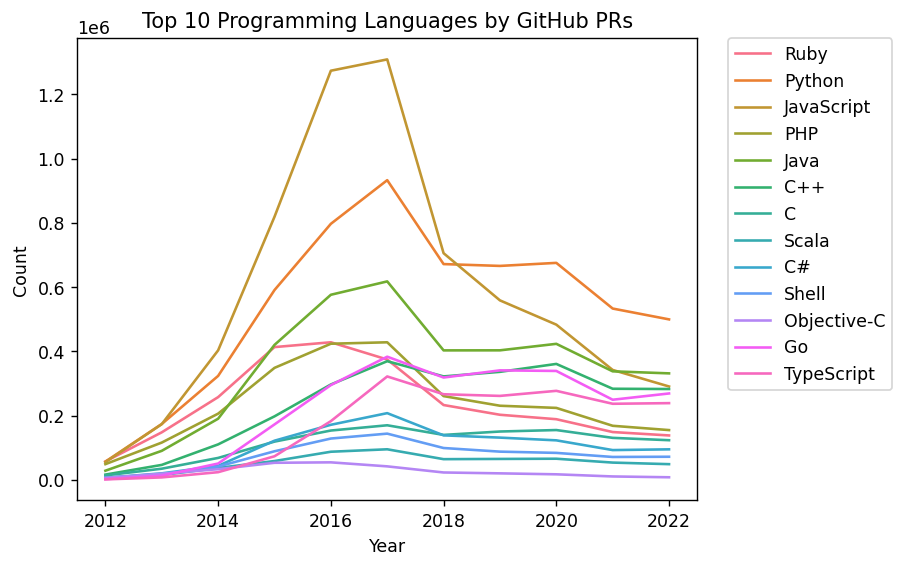

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

dg = prs.copy()
dg = dg[dg.year > 2011]
dg = dg[dg.year < 2023]

s = set()
for top in tops.values():
    for name, _ in top:
        s.add(name)

dg = dg[dg.name.isin(s)]

plt.figure(dpi=125)
sns.lineplot(data=dg, x='year', y='count', hue='name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Top 10 Programming Languages by GitHub PRs')
plt.xlabel('Year')
plt.ylabel('Count')

In [6]:
dg = dg.pivot_table(index='name', columns='year', values='count')
dg

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
name,,,,,,,,,,,
C,13374,34316,67849,118680,153192,169554,139537,150122,154707,130367,123038
C#,5912,19830,43134,121494,171111,207370,138161,131139,122631,92282,94617
C++,15911,46144,110027,197348,296639,369171,321789,336020,360709,283330,282528
Go,1711,12470,50396,172233,294718,383230,318319,340621,338821,249116,268672
Java,28052,89953,189995,419927,576121,617745,402861,403033,423265,337610,331278
JavaScript,54876,173145,402966,819073,1274074,1309313,705605,558636,483050,341877,290380
Objective-C,5476,18708,32795,52713,54088,41590,22519,19799,16809,10137,7587
PHP,48483,115679,205783,348385,423617,428082,260461,230439,223713,167977,154579
Python,56322,173512,323357,590794,797140,933120,671699,665996,675463,533204,499436


In [7]:
for year in range(2012,2023):
    l = list(dg[year].sort_values())
    dg[year] = dg[year].map(lambda x: l.index(x)-2 if x in l else 0)

dg

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
name,,,,,,,,,,,
C,4,4,4,2,1,1,2,2,2,2,2
C#,2,3,2,3,2,2,1,1,1,1,1
C++,5,5,5,5,5,4,7,6,7,7,7
Go,-1,-1,3,4,4,6,6,7,6,6,6
Java,6,6,6,8,8,8,8,8,8,8,9
JavaScript,8,9,10,10,10,10,10,9,9,9,8
Objective-C,0,2,-1,-2,-2,-2,-2,-2,-2,-2,-2
PHP,7,7,7,6,6,7,4,4,4,4,4
Python,9,10,9,9,9,9,9,10,10,10,10


In [8]:
dg = dg.applymap(lambda x: x if x > 0 else None).T
dg

name,C,C#,C++,Go,Java,JavaScript,Objective-C,PHP,Python,Ruby,Scala,Shell,TypeScript
year,,,,,,,,,,,,,
2012,4.0,2.0,5.0,NaN,6.0,8.0,NaN,7.0,9.0,10.0,3.0,1.0,NaN
2013,4.0,3.0,5.0,NaN,6.0,9.0,2.0,7.0,10.0,8.0,NaN,1.0,NaN
2014,4.0,2.0,5.0,3.0,6.0,10.0,NaN,7.0,9.0,8.0,NaN,1.0,NaN
2015,2.0,3.0,5.0,4.0,8.0,10.0,NaN,6.0,9.0,7.0,NaN,1.0,NaN
2016,1.0,2.0,5.0,4.0,8.0,10.0,NaN,6.0,9.0,7.0,NaN,NaN,3.0
2017,1.0,2.0,4.0,6.0,8.0,10.0,NaN,7.0,9.0,5.0,NaN,NaN,3.0
2018,2.0,1.0,7.0,6.0,8.0,10.0,NaN,4.0,9.0,3.0,NaN,NaN,5.0
2019,2.0,1.0,6.0,7.0,8.0,9.0,NaN,4.0,10.0,3.0,NaN,NaN,5.0
2020,2.0,1.0,7.0,6.0,8.0,9.0,NaN,4.0,10.0,3.0,NaN,NaN,5.0


In [9]:
dg.to_csv('canva/prs.csv', index=False)

Text(0, 0.5, 'Count')

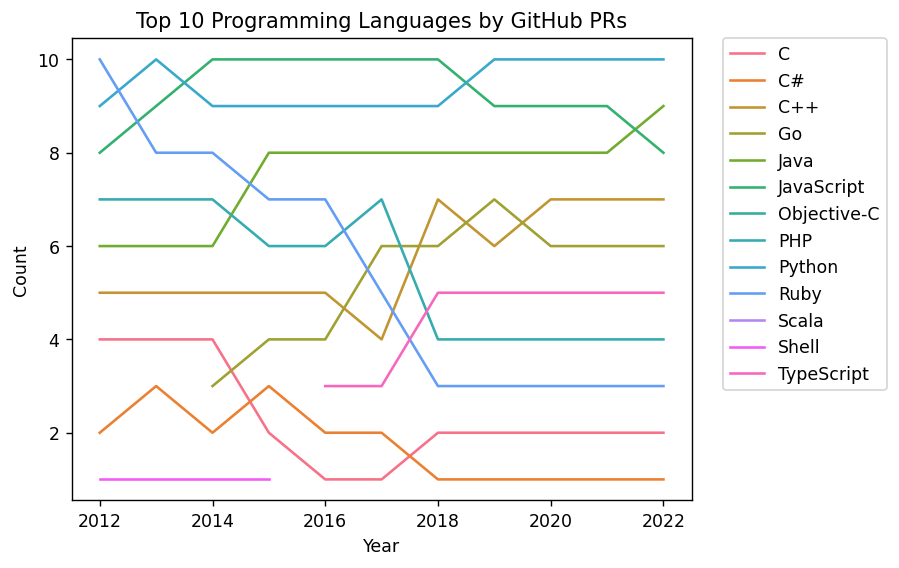

In [10]:
dg = pd.melt(dg.reset_index(), id_vars='year', value_vars=dg.columns)

plt.figure(dpi=125)
sns.lineplot(data=dg, x='year', y='value', hue='name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Top 10 Programming Languages by GitHub PRs')
plt.xlabel('Year')
plt.ylabel('Count')